In [1]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 8.2.0


# Reading images

Code read images and create a zipped list, where the first element is focal length, and the second is a two-dimensional array of integers encoding the grey scale of the image.

['/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP06_Zr=-0.0351.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP03_Zr=-0.0321.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP13_Zr=-0.0421.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP04_Zr=-0.0331.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP14_Zr=-0.0431.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP09_Zr=-0.0381.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP10_Zr=-0.0391.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP00_Zr=-0.0291.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP05_Zr=-0.0341.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP11_Zr=-0.0401.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP01_Zr=-0.0301.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP02_Zr=-0.0311.TIF', '/Users/likask/mofem_install/massimo/CTRL_PT_0002_SNAP07_Zr=-0.0361.TIF', '/Users/likask/mofem_install/massimo/

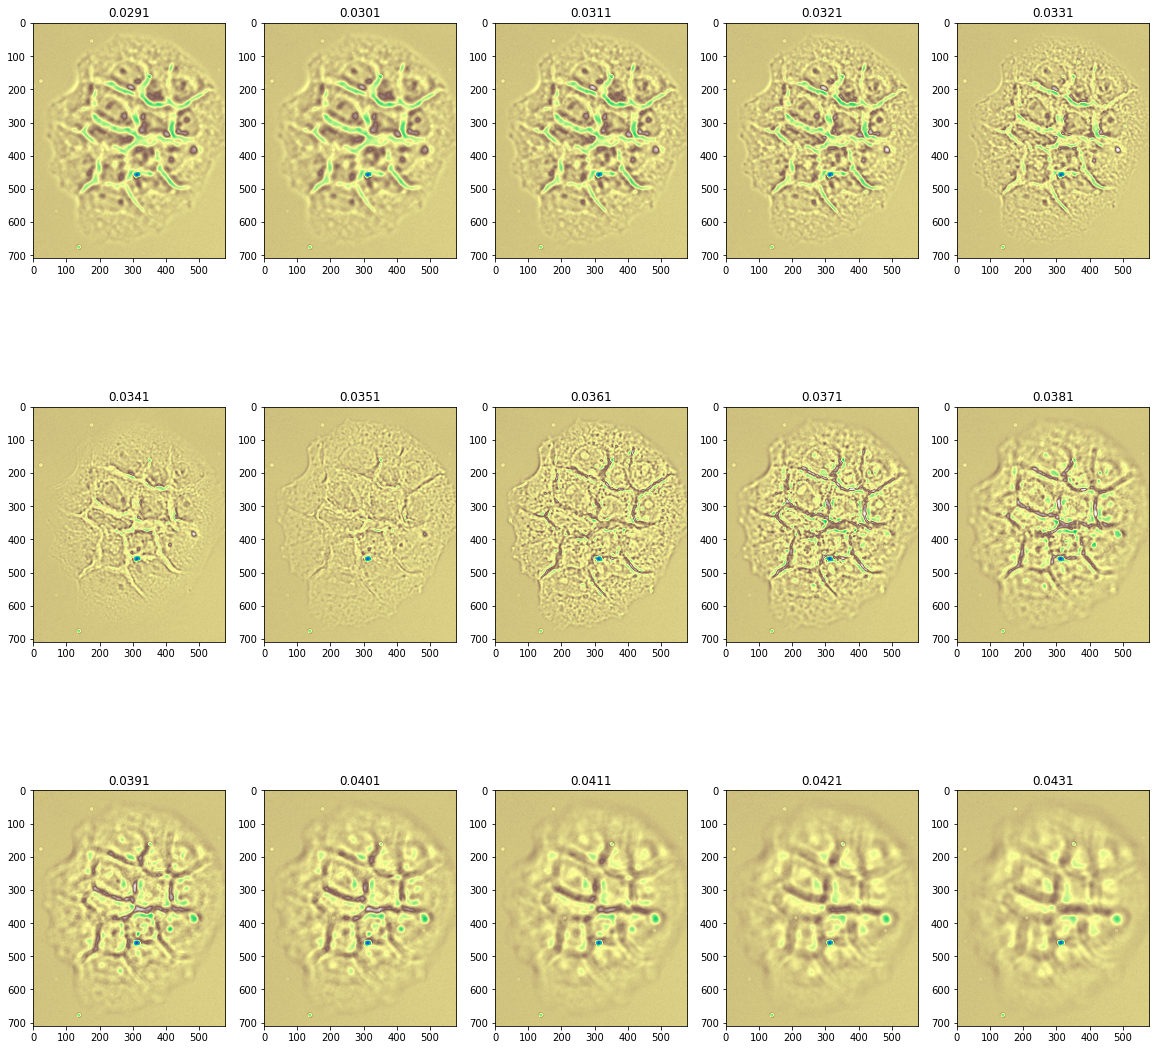

In [2]:
import glob
import re
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from numpy import asarray

pyplot.rcParams['figure.figsize'] = [20, 20]

tifffiles = []
for file in glob.glob("/Users/likask/mofem_install/massimo/*.TIF"):
    tifffiles.append(file)
    
print(tifffiles)

zooms=[]
for file in tifffiles:
    z = re.search("[0-9]\.[0-9]*",file)
    zooms.append(float(z.group()))
print(zooms)

crop_data=[]
for file in tifffiles:
    im = image.imread(file)
    data = asarray(im)
    im_crop = Image.fromarray(data).crop((1020,340,1600,1050))
    crop_data.append(asarray(im_crop))
    #pyplot.imshow(image_crop, cmap ='Greys')
       
print(len(crop_data))

rmax = 0
for d in crop_data:
    rmax=max(d.max(),rmax)

rmin = rmax
for d in crop_data:
    rmin=min(d.min(),rmin)

print(rmin,rmax)

zipped = zip(zooms, crop_data)
zipped = sorted(zipped, key = lambda x: x[0])

fig, axs = pyplot.subplots(3,5)

n = 0
r = 0
for z, d in zipped:
    c = n % 5
    axs[r,c].imshow(Image.fromarray(d), cmap ='terrain', clim=(rmin,rmax)) 
    axs[r,c].set_title(z)
    n = n+1
    if c == 4:
        r = r+1
 
    

# What is format of "out_array.txt"?

"out_array.txt" is generated by saving integers, starting with the number of images. Each image is saved starting from size, number of pixels in rows and columns, and then series of integers encoding grey scale on each picture. 

In [3]:
f = open("out_arrays.txt", "w")
f.write(str(len(zipped))+"\n")
for z,d in zipped:
  f.write(str(int(z*10000))+"\n")
  f.write(str(d.shape[0])+" "+str(d.shape[1])+"\n")
  for r in d:
   for c in r: 
     f.write(str(c)+" ")
  f.write("\n")
f.close()